In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

D:\Anaconda\envs\ML\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\ML\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Anaconda\envs\ML\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
xls = pd.ExcelFile('../data.xlsx')

In [3]:
df = {}
for num in xls.sheet_names[1:-1]:
    df[num] = pd.read_excel(xls, num) 

In [4]:
for key in df:
    df[key]['SyncDate'] = pd.to_datetime(df[key]['SyncDate'])
    df[key].sort_values(by='SyncDate', ascending=True, inplace=True)
    df[key]['SyncDate'] = df[key]['SyncDate'].dt.floor('H')
    df[key] = df[key].resample('H', on = 'SyncDate').mean()
    df[key] = df[key].interpolate(method='linear', limit_direction='both')
    df[key].drop_duplicates(inplace=True)

In [5]:
df_radon = pd.DataFrame(index=df['50'].index)

In [9]:
for key in df:
    print(key)
    df_radon[f'Radon_{key}'] = df[key]['Radon']

1
2
3
4
5
8
9
10
11
13
15
16
17
18
19
20
21
22
23
25
26
27
28
29
30
31
32
35
36
37
39
41
43
44
45
46
48
49
50


In [10]:
df_radon = df_radon.interpolate(method='linear', limit_direction='both')

In [11]:
df_radon

,Radon_1,Radon_2,Radon_3,Radon_4,Radon_5,Radon_8,Radon_9,Radon_10,Radon_11,Radon_13,...,Radon_37,Radon_39,Radon_41,Radon_43,Radon_44,Radon_45,Radon_46,Radon_48,Radon_49,Radon_50
SyncDate,,,,,,,,,,,,,,,,,,,,,
2022-05-11 18:00:00,2.2,1.0,1.1,1.5,7.2,6.80,24.9,1.3,9.4,3.7,...,0.6,0.5,1.2,10.9,18.6,5.6,0.9,16.6,1.1,0.0
2022-05-11 19:00:00,2.2,1.0,1.2,1.6,7.1,6.80,24.6,1.3,10.0,3.7,...,0.7,0.5,1.2,10.8,18.6,5.6,0.9,17.2,1.2,6.9
2022-05-11 20:00:00,2.2,1.0,1.2,1.6,7.1,6.80,24.3,1.4,10.0,3.6,...,0.6,0.5,1.3,10.2,18.7,5.7,0.9,18.1,1.1,8.2
2022-05-11 21:00:00,2.3,1.0,1.1,1.7,7.1,6.80,23.8,1.5,10.2,3.6,...,0.6,0.5,1.2,10.3,19.2,5.6,1.0,18.0,1.0,9.6
2022-05-11 22:00:00,2.3,1.0,0.9,1.8,7.0,6.60,24.0,1.6,10.2,3.6,...,0.7,0.5,1.2,10.2,19.2,5.2,1.0,18.4,0.9,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-07 19:00:00,48.0,67.0,151.3,283.1,88.7,37.00,61.8,2.7,84.3,96.5,...,24.3,1.9,23.5,30.5,82.7,54.1,222.1,48.8,1.1,113.6
2022-08-07 20:00:00,56.9,67.0,153.8,281.9,92.4,36.60,62.0,2.7,83.2,98.7,...,24.7,1.7,24.0,29.9,82.7,53.9,226.6,48.5,1.1,119.2
2022-08-07 21:00:00,59.0,68.5,156.2,289.2,87.2,36.40,61.7,2.7,88.6,100.5,...,24.8,1.6,24.3,29.7,82.7,53.7,231.9,48.8,1.0,123.1


In [12]:
df_radon = df_radon.T

In [13]:
df_radon

SyncDate,2022-05-11 18:00:00,2022-05-11 19:00:00,2022-05-11 20:00:00,2022-05-11 21:00:00,2022-05-11 22:00:00,2022-05-11 23:00:00,2022-05-12 00:00:00,2022-05-12 01:00:00,2022-05-12 02:00:00,2022-05-12 03:00:00,...,2022-08-07 14:00:00,2022-08-07 15:00:00,2022-08-07 16:00:00,2022-08-07 17:00:00,2022-08-07 18:00:00,2022-08-07 19:00:00,2022-08-07 20:00:00,2022-08-07 21:00:00,2022-08-07 22:00:00,2022-08-07 23:00:00
Radon_1,2.2,2.2,2.2,2.3,2.3,2.3,2.2,2.3,2.3,1.9,...,28.1,31.300000,35.400000,43.0,49.6,48.0,56.9,59.00,55.40,56.6
Radon_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,0.7,...,64.1,64.500000,65.100000,65.7,66.8,67.0,67.0,68.50,70.60,69.2
Radon_3,1.1,1.2,1.2,1.1,0.9,0.9,0.8,0.8,0.8,0.8,...,132.8,136.000000,144.200000,144.3,147.7,151.3,153.8,156.20,160.50,163.6
Radon_4,1.5,1.6,1.6,1.7,1.8,1.8,1.9,1.9,2.0,2.0,...,238.3,248.200000,257.400000,266.5,274.9,283.1,281.9,289.20,293.80,298.7
Radon_5,7.2,7.1,7.1,7.1,7.0,7.0,7.0,7.1,6.8,6.2,...,38.9,48.300000,61.100000,72.8,81.2,88.7,92.4,87.20,92.10,90.6
Radon_8,6.8,6.8,6.8,6.8,6.6,6.6,6.3,6.0,5.2,4.4,...,36.6,36.000000,36.300000,37.0,36.6,37.0,36.6,36.40,36.25,36.1
Radon_9,24.9,24.6,24.3,23.8,24.0,24.0,23.3,21.0,19.4,18.0,...,60.2,60.600000,61.300000,61.5,61.9,61.8,62.0,61.70,61.90,61.9
Radon_10,1.3,1.3,1.4,1.5,1.6,1.5,1.5,1.5,1.1,1.1,...,2.7,2.700000,2.700000,2.7,2.7,2.7,2.7,2.70,2.70,2.7
Radon_11,9.4,10.0,10.0,10.2,10.2,10.0,9.4,8.9,8.9,8.3,...,46.3,56.700000,65.000000,70.8,78.4,84.3,83.2,88.60,93.50,96.5
Radon_13,3.7,3.7,3.6,3.6,3.6,3.3,2.9,2.5,2.2,2.2,...,88.4,92.900000,91.800000,93.0,94.4,96.5,98.7,100.50,100.60,97.0


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
values = sc.fit_transform(df_radon.values)

In [15]:
import umap
reducer = umap.UMAP(n_components=3)

In [16]:
embedding = reducer.fit_transform(values)

In [17]:
embedding.shape

(39, 3)

In [18]:
from sklearn.cluster import SpectralClustering, AffinityPropagation

In [19]:
clustering = AffinityPropagation().fit(embedding)
y_pred = clustering.labels_

Text(0.5, 0.92, 'UMAP projection of the Radon dataset with Affinity Clustering')

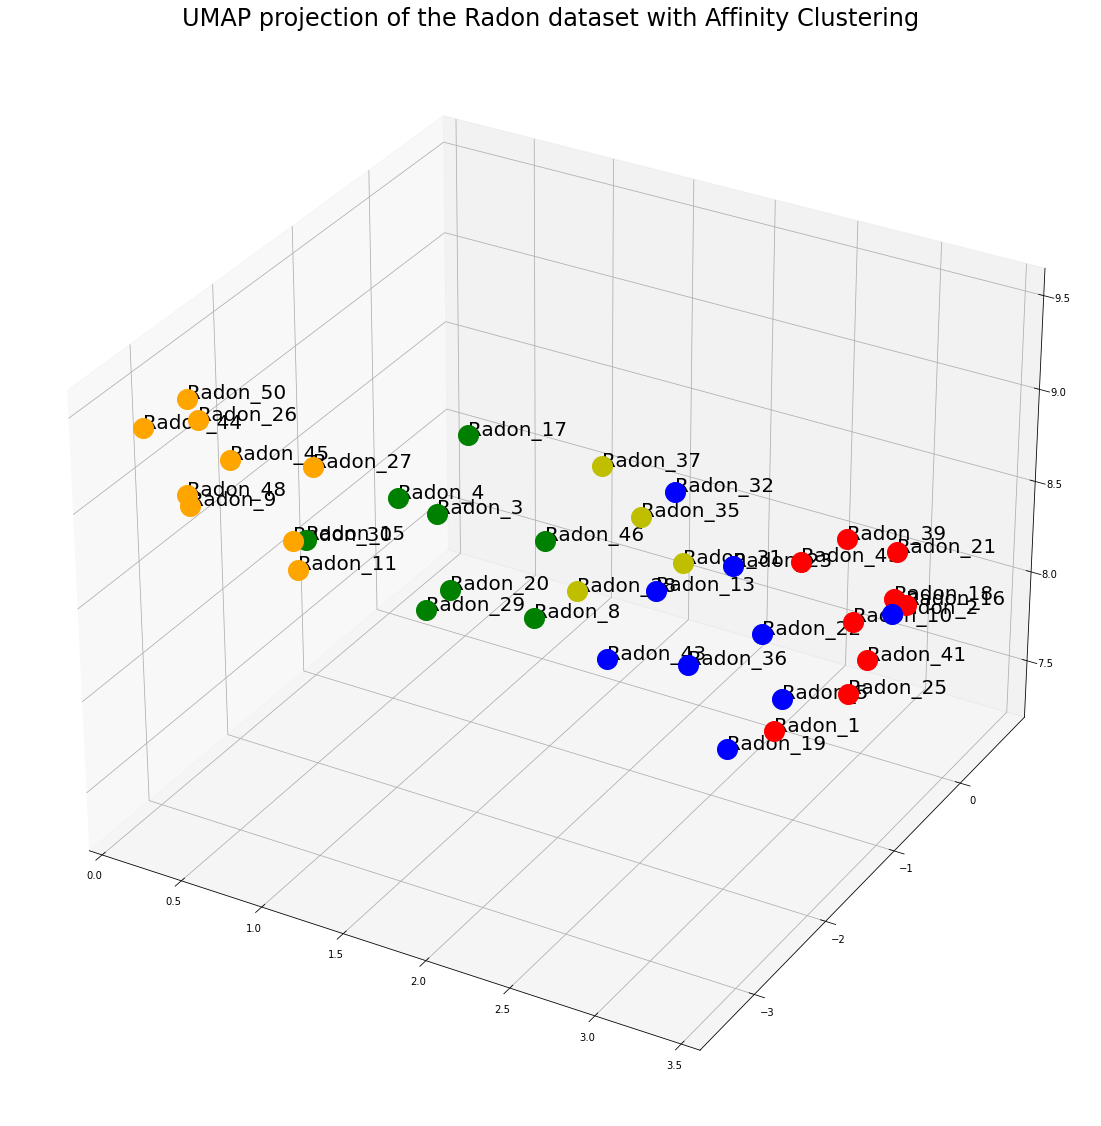

In [21]:
import matplotlib.pyplot as plt
names = list(df_radon.index)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b','y','orange']
for i in range(len(embedding)):
    x = embedding[i,0]
    y = embedding[i, 1]
    z = embedding[i, 2]
    ax.scatter(
        x,
    y,z, s=400, c=colors[y_pred[i]])
    ax.text(x,y,z, names[i], size=20, zorder=1, color='k')

plt.title('UMAP projection of the Radon dataset with Affinity Clustering', fontsize=24)

In [22]:
from IPython.display import HTML
from matplotlib import animation
def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())

In [23]:
clusters =dict.fromkeys(set(clustering.labels_), None)

In [32]:
import numpy as np
for i in clusters:
    clusters[i] = list(np.where(clustering.labels_ == i)[0])

In [33]:
clusters

{0: [0, 7, 11, 13, 16, 19, 30, 31, 37],
 1: [2, 3, 5, 10, 12, 15, 23, 35],
 2: [1, 4, 9, 14, 17, 18, 26, 28, 32],
 3: [22, 25, 27, 29],
 4: [6, 8, 20, 21, 24, 33, 34, 36, 38]}

In [28]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
df_radon_scaled = pd.DataFrame(values, index=df_radon.index, columns = df_radon.columns)
for i in clusters:
    traces=[go.Scatter(
        x = df_radon_scaled.columns,
        y = df_radon_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in [list(df_radon_scaled.index)[j] for j in clusters[i]]]
    
    layout = go.Layout(title = f'Visualizing Scaled values of Cluster {i}')
    fig = go.Figure(data=traces, layout = layout)
    pyo.plot(fig, filename=f'Cluster_Affinity_{i}.html')

In [34]:
for i in clusters:
    clusters[i] = [list(df_radon_scaled.index)[j] for j in clusters[i]]

In [37]:
cluster_0 = pd.DataFrame(df_radon, index=clusters[0])
cluster_0_scaled = pd.DataFrame(df_radon_scaled, index=clusters[0])
cluster_1 = pd.DataFrame(df_radon, index=clusters[1])
cluster_1_scaled = pd.DataFrame(df_radon_scaled, index=clusters[1])
cluster_2 = pd.DataFrame(df_radon, index=clusters[2])
cluster_2_scaled = pd.DataFrame(df_radon_scaled, index=clusters[2])
cluster_3 = pd.DataFrame(df_radon, index=clusters[3])
cluster_3_scaled = pd.DataFrame(df_radon_scaled, index=clusters[3])
cluster_4 = pd.DataFrame(df_radon, index=clusters[4])
cluster_4_scaled = pd.DataFrame(df_radon_scaled, index=clusters[4])

In [105]:
cluster_0_median = cluster_0.median(axis=0)

In [106]:
cluster_0_scaled_median = cluster_0_scaled.median(axis=0)

In [107]:
cluster_1_median = cluster_1.median(axis=0)

In [108]:
cluster_1_scaled_median = cluster_1_scaled.median(axis=0)

In [109]:
cluster_2_median = cluster_2.median(axis=0)

In [110]:
cluster_2_scaled_median = cluster_2_scaled.median(axis=0)

In [111]:
cluster_3_median = cluster_3.median(axis=0)

In [112]:
cluster_3_scaled_median = cluster_3_scaled.median(axis=0)

In [113]:
cluster_4_median = cluster_4.median(axis=0)

In [114]:
cluster_4_scaled_median = cluster_4_scaled.median(axis=0)

In [115]:
cluster_0.loc['CM'] = cluster_0_median

In [116]:
cluster_0_scaled.loc['CM'] = cluster_0_scaled_median

In [117]:
cluster_1.loc['CM'] = cluster_1_median

In [118]:
cluster_1_scaled.loc['CM'] = cluster_1_scaled_median

In [119]:
cluster_2.loc['CM'] = cluster_2_median

In [120]:
cluster_2_scaled.loc['CM'] = cluster_2_scaled_median

In [121]:
cluster_3.loc['CM'] = cluster_3_median

In [122]:
cluster_3_scaled.loc['CM'] = cluster_3_scaled_median

In [123]:
cluster_4.loc['CM'] = cluster_4_median

In [124]:
cluster_4_scaled.loc['CM'] = cluster_4_scaled_median

In [125]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_0.columns,
        y = cluster_0.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_0.index]
    
layout = go.Layout(title = f'Visualizing values of Cluster 0')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_raw_0.html')

'Cluster_Affinity_raw_0.html'

In [130]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_0_scaled.columns,
        y = cluster_0_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_0_scaled.index]
    
layout = go.Layout(title = f'Visualizing scaled values of Cluster 0')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_0.html')

'Cluster_Affinity_0.html'

In [126]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_1.columns,
        y = cluster_1.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_1.index]
    
layout = go.Layout(title = f'Visualizing values of Cluster 1')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_raw_1.html')

'Cluster_Affinity_raw_1.html'

In [131]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_1_scaled.columns,
        y = cluster_1_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_1_scaled.index]
    
layout = go.Layout(title = f'Visualizing scaled values of Cluster 1')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_1.html')

'Cluster_Affinity_1.html'

In [127]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_2.columns,
        y = cluster_2.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_2.index]
    
layout = go.Layout(title = f'Visualizing values of Cluster 2')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_raw_2.html')

'Cluster_Affinity_raw_2.html'

In [132]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_2_scaled.columns,
        y = cluster_2_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_2_scaled.index]
    
layout = go.Layout(title = f'Visualizing scaled values of Cluster 2')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_2.html')

'Cluster_Affinity_2.html'

In [128]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_3.columns,
        y = cluster_3.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_3.index]
    
layout = go.Layout(title = f'Visualizing values of Cluster 3')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_raw_3.html')

'Cluster_Affinity_raw_3.html'

In [133]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_3_scaled.columns,
        y = cluster_3_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_3_scaled.index]
    
layout = go.Layout(title = f'Visualizing scaled values of Cluster 3')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_3.html')

'Cluster_Affinity_3.html'

In [129]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_4.columns,
        y = cluster_4.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_4.index]
    
layout = go.Layout(title = f'Visualizing values of Cluster 4')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_raw_4.html')

'Cluster_Affinity_raw_4.html'

In [134]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
traces=[go.Scatter(
        x = cluster_4_scaled.columns,
        y = cluster_4_scaled.loc[name,:],
        mode = 'markers+lines',
        name = name
    ) for name in cluster_4_scaled.index]
    
layout = go.Layout(title = f'Visualizing scaled values of Cluster 4')
fig = go.Figure(data=traces, layout = layout)
pyo.plot(fig, filename=f'Cluster_Affinity_4.html')

'Cluster_Affinity_4.html'

In [135]:
!pip install fitter

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 59.0/59.0 kB ? eta 0:00:00
  Created wheel for fitter: filename=fitter-1.4.1-py3-none-any.whl size=25231 sha256=a4b4eb32c93f4207f8429fbdd64ea96e90112b7f84c5d8093c132fd4b516d10d
  Stored in directory: c:\users\alifbros\appdata\local\pip\cache\wheels\38\ee\21\98ef5c3186a1f3e8747aa54cf9610fda8876ea82e06c670400
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=582f981d65bd59960a2d233bca388b5e04522aec73ec9d02d64df53d415555b5
  Stored in directory: c:\users\alifbros\appdata\local\pip\cache\wheels\82\ab\83\fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,27.382942,68.779654,-8622.671458,inf,0.036530,9.076297e-03
gamma,29.435521,62.717168,-8477.240335,inf,0.050680,6.245176e-05
rayleigh,40.837460,22.917934,-7826.123123,inf,0.066753,3.073560e-08
cauchy,48.106802,96.231682,-7496.509674,inf,0.124068,1.882442e-27
norm,53.466125,51.157668,-7283.992759,inf,0.108592,4.068980e-21


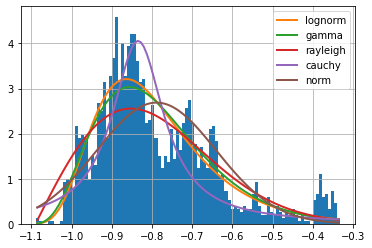

In [147]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_0_scaled_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [148]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.388118201725706,
  'loc': -1.1607979332685736,
  'scale': 0.3452033021514255}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,13.880505,268.095082,-9989.694557,inf,0.092774,1.604387e-15
cauchy,14.392849,237.601314,-9924.374114,inf,0.108920,3.046840e-21
norm,15.014825,245.326826,-9839.253398,inf,0.083918,8.947071e-13
lognorm,15.166273,244.894589,-9811.453939,inf,0.084114,7.834542e-13
gamma,15.497632,239.961405,-9767.968282,inf,0.089251,2.143583e-14


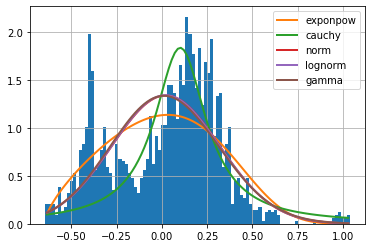

In [149]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_1_scaled_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [150]:
f.get_best(method = 'sumsquare_error')

{'exponpow': {'b': 1.6887687011533314,
  'loc': -0.6507873984717181,
  'scale': 0.9707826795693066}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,14.004142,106.599899,-9979.459378,inf,0.050778,6.001639e-05
lognorm,14.026800,108.861762,-9968.599876,inf,0.052126,3.429429e-05
gamma,14.332710,107.927422,-9925.191827,inf,0.056710,4.579715e-06
cauchy,15.073498,145.175173,-9831.406467,inf,0.068147,1.438186e-08
exponpow,20.387871,97.867067,-9216.171390,inf,0.071254,2.503364e-09


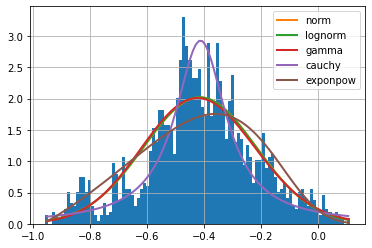

In [151]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_2_scaled_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [152]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': -0.4147528810035208, 'scale': 0.19746888863383305}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,5.080168,438.543920,-12019.645120,inf,0.117661,1.001246e-24
lognorm,6.704148,347.585782,-11453.945293,inf,0.085147,3.865864e-13
rayleigh,17.771969,365.100437,-9500.061597,inf,0.219585,1.133016e-85
norm,23.657302,377.212338,-8924.530181,inf,0.213906,2.823064e-81
exponpow,24.714389,247.648620,-8828.971172,inf,0.234956,3.532298e-98


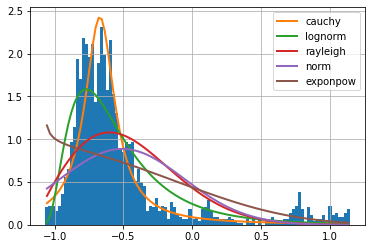

In [153]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_3_scaled_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [154]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': -0.671419471901695, 'scale': 0.13100120177554023}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,7.767608,167.771631,-11157.706970,0.082021,0.062805,2.422371e-07
powerlaw,10.794430,136.022871,-10495.622178,0.148651,0.089262,2.125429e-14
norm,12.839578,177.777436,-10154.142585,0.131596,0.108632,3.927617e-21
lognorm,12.921371,180.177255,-10133.759213,0.132481,0.109511,1.806347e-21
chi2,13.399259,180.651565,-10060.689829,0.137783,0.110063,1.106100e-21


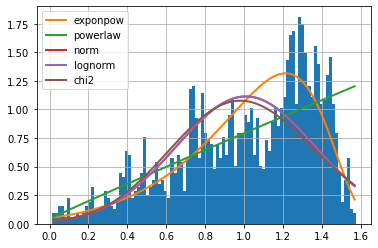

In [155]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_4_scaled_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [156]:
f.get_best(method = 'sumsquare_error')

{'exponpow': {'b': 5.835802696198629,
  'loc': -1.0883048653567715,
  'scale': 2.419835988438156}}

In [164]:
#actual data
cluster_0_median = sc.inverse_transform(cluster_0_scaled_median.values.reshape(1,-1))
cluster_1_median = sc.inverse_transform(cluster_1_scaled_median.values.reshape(1,-1))
cluster_2_median = sc.inverse_transform(cluster_2_scaled_median.values.reshape(1,-1))
cluster_3_median = sc.inverse_transform(cluster_3_scaled_median.values.reshape(1,-1))
cluster_4_median = sc.inverse_transform(cluster_4_scaled_median.values.reshape(1,-1))

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.431507,486.001517,-16973.259464,inf,0.085175,3.790789e-13
chi2,0.431513,486.001863,-16973.230177,inf,0.085177,3.786016e-13
lognorm,0.481370,491.523133,-16753.240775,inf,0.091157,5.339960e-15
rayleigh,0.542354,478.235236,-16520.853685,inf,0.086664,1.348042e-13
expon,0.618823,496.562310,-16255.469425,inf,0.118904,3.043051e-25


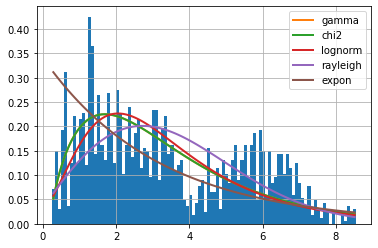

In [166]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_0_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [167]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.8803261228006827,
  'loc': 0.17758110421474832,
  'scale': 1.7247653571476653}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.005738,1518.985808,-25665.589659,inf,0.122261,1.143723e-26
cauchy,0.006204,1326.178588,-25515.942462,inf,0.140384,4.683064e-35
rayleigh,0.006421,1913.046620,-25446.794788,inf,0.141175,1.894366e-35
lognorm,0.006440,1357.782380,-25433.083944,inf,0.076408,1.158237e-10
expon,0.006651,1298.562501,-25375.910976,inf,0.157454,4.917484e-44


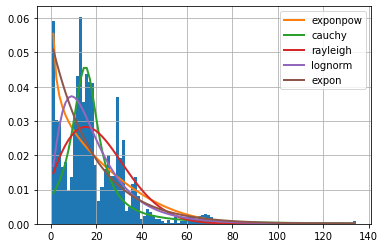

In [168]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_1_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [169]:
f.get_best(method = 'sumsquare_error')

{'exponpow': {'b': 0.7620898744811415,
  'loc': 0.40000000000000024,
  'scale': 35.23230464743578}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.005482,1415.748757,-25764.756076,inf,0.175350,1.406344e-54
expon,0.006085,1426.724706,-25555.023792,inf,0.105129,8.134996e-20
exponpow,0.009678,1818.127840,-24613.725983,inf,0.114694,1.633727e-23
rayleigh,0.018834,1965.418635,-23281.684755,inf,0.251937,4.952550e-113
powerlaw,0.021508,1027.250804,-23006.993239,inf,0.316157,2.771563e-179


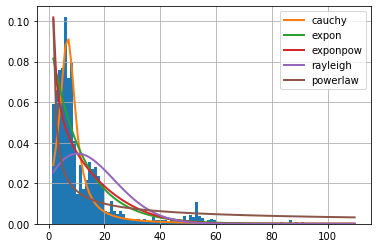

In [170]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_2_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [171]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 6.797333792218233, 'scale': 3.4626380710296987}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,0.032989,760.744137,-22146.350368,inf,0.085329,3.408826e-13
chi2,0.041783,797.650884,-21670.866622,inf,0.112550,1.175629e-22
powerlaw,0.048095,709.698066,-21387.804207,inf,0.193194,2.965699e-66
expon,0.060853,792.137322,-20922.012297,inf,0.092016,2.825119e-15
gamma,0.061583,852.054052,-20890.426949,inf,0.181448,1.944449e-58


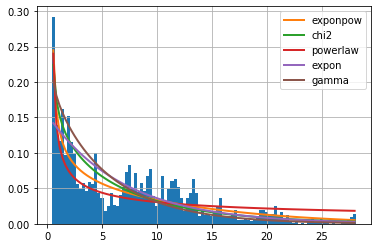

In [172]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_3_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [173]:
f.get_best(method = 'sumsquare_error')

{'exponpow': {'b': 0.6196324619024698,
  'loc': 0.39999999999999936,
  'scale': 15.008927411584335}}

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.001537,1277.039258,-28315.553476,inf,0.051383,4.676270e-05
gamma,0.001737,1298.801149,-28069.170404,inf,0.066265,3.993245e-08
chi2,0.001737,1298.800510,-28069.168745,inf,0.066265,3.993566e-08
cauchy,0.002306,1357.340385,-27507.455849,inf,0.167183,1.271305e-49
expon,0.002561,1252.805246,-27295.799479,inf,0.104347,1.578556e-19


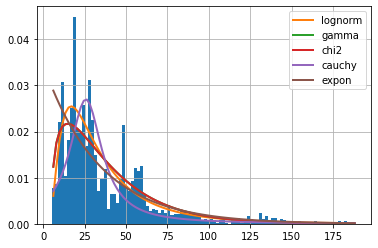

In [174]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(cluster_4_median,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [175]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.7873817662246807,
  'loc': 2.2821677143105754,
  'scale': 27.10763440146112}}